<a href="https://colab.research.google.com/github/berkaycamur/data_science_projects/blob/main/Machine_Learning_with_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In this notebook, I'll study for predict the **"MEDV"** feature with highest accuracy. So, I want to start by getting know the dataset.
Dataset's columns means are described below.

**CRIM:**
per capita crime rate by town.

**ZN:**
proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS:**
proportion of non-retail business acres per town.

**CHAS:**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**NOX:**
nitrogen oxides concentration (parts per 10 million).

**RM:**
average number of rooms per dwelling.

**AGE:**
proportion of owner-occupied units built prior to 1940.

**DIS:**
weighted mean of distances to five Boston employment centres.

**RAD:**
index of accessibility to radial highways.

**TAX:**
full-value property-tax rate per \$10,000.

**PTRATIO:**
pupil-teacher ratio by town.

**B:**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**LSTAT**
lower status of the population (percent).

**MEDV**: 
median value of owner-occupied homes in \$1000s.

In [ ]:
df.shape #Shape of the data 

(506, 14)

In [ ]:
df.isnull().sum() #Missing value check

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.describe() #Statistical describes of the data set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If you check the statistics carefully, you can see that the features called "CHAS" and "ZN" are categorical variables. Their quartiles are directly 0 and another statistics also shows that they are categorical variables. On the other hand, we want to predict a numerical value(MEDV). So, these two categorical variable can create some problem for us. We have to get rid of them.

In [ ]:
df = df.drop(['CHAS', 'ZN'], axis = 1) #Dropping categorical variables. This cell can be worked just for a time.

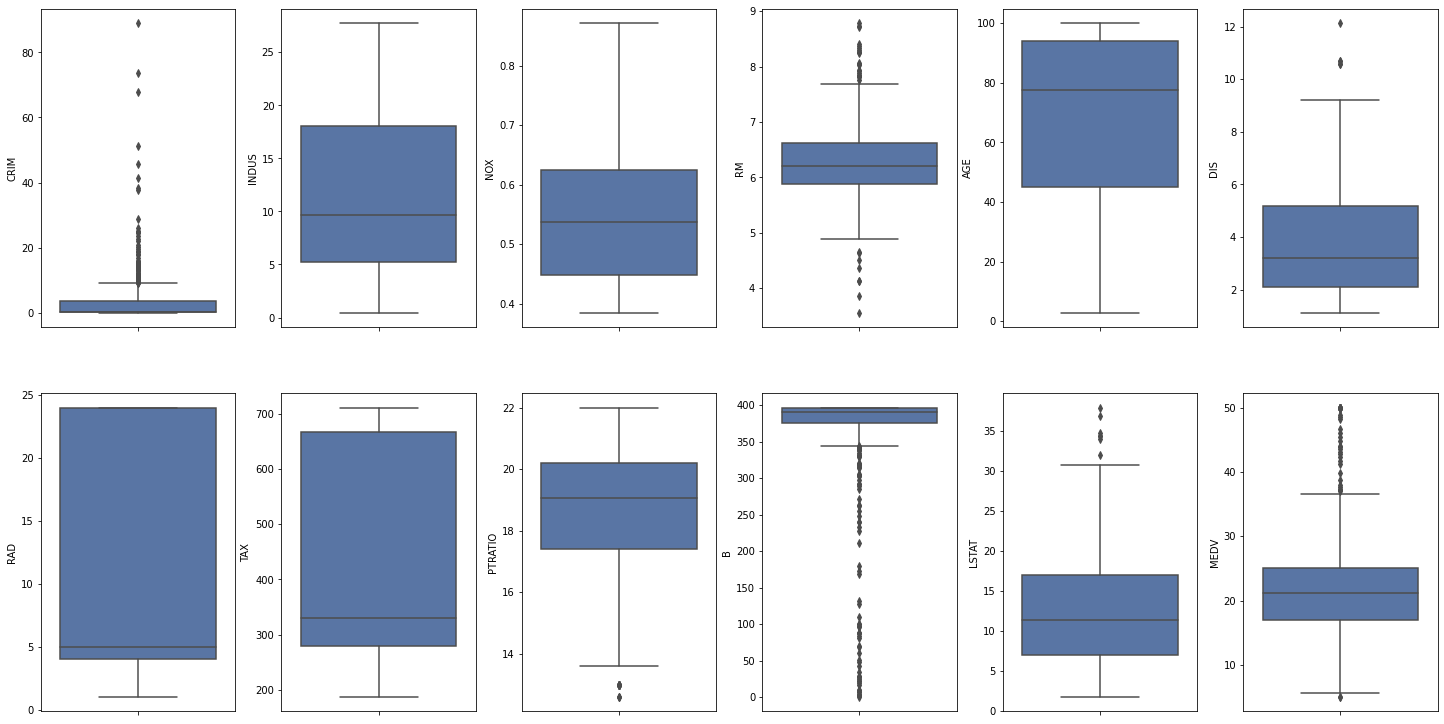

In [ ]:
fig, axs = plt.subplots(nrows= 2, ncols=6, figsize = (20,10))
index = 0
sns.set_theme(style= "whitegrid")
axs = axs.flatten() # We have to convert axis variable to numpy array.
for i in df.columns:
  sns.boxplot(y = df[i], ax= axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We can clearly see that the features called B, CRIM, RM and MEDV have outliers. We must get rid of them for healthy predictions.

In [ ]:
from scipy import stats

--- I want to use IQR method to remove outliers. Actually, we're not removing or dropping the outliers. There are 4 main ideas to deal with outliers. 1-Dropping, 2-Filling with the mean, 3-Iqr method, 4- Z score.
First and second techniques are usually deranges the nature of the data set. So, I'll use the iqr method. 
Note: There is no any difference between third and fourth methods, third is completely my choice.

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
column_names_loop = ['CRIM','INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for column in column_names_loop:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    max_limit = q3 + iqr * 1.5
    min_limit = q1 - iqr * 1.5
    max_outliers = (df[column] > max_limit)
    min_outliers = (df[column] < min_limit)
    df[column][min_outliers] = min_limit
    df[column][max_outliers] = max_limit

Checking outliers after cleaning process

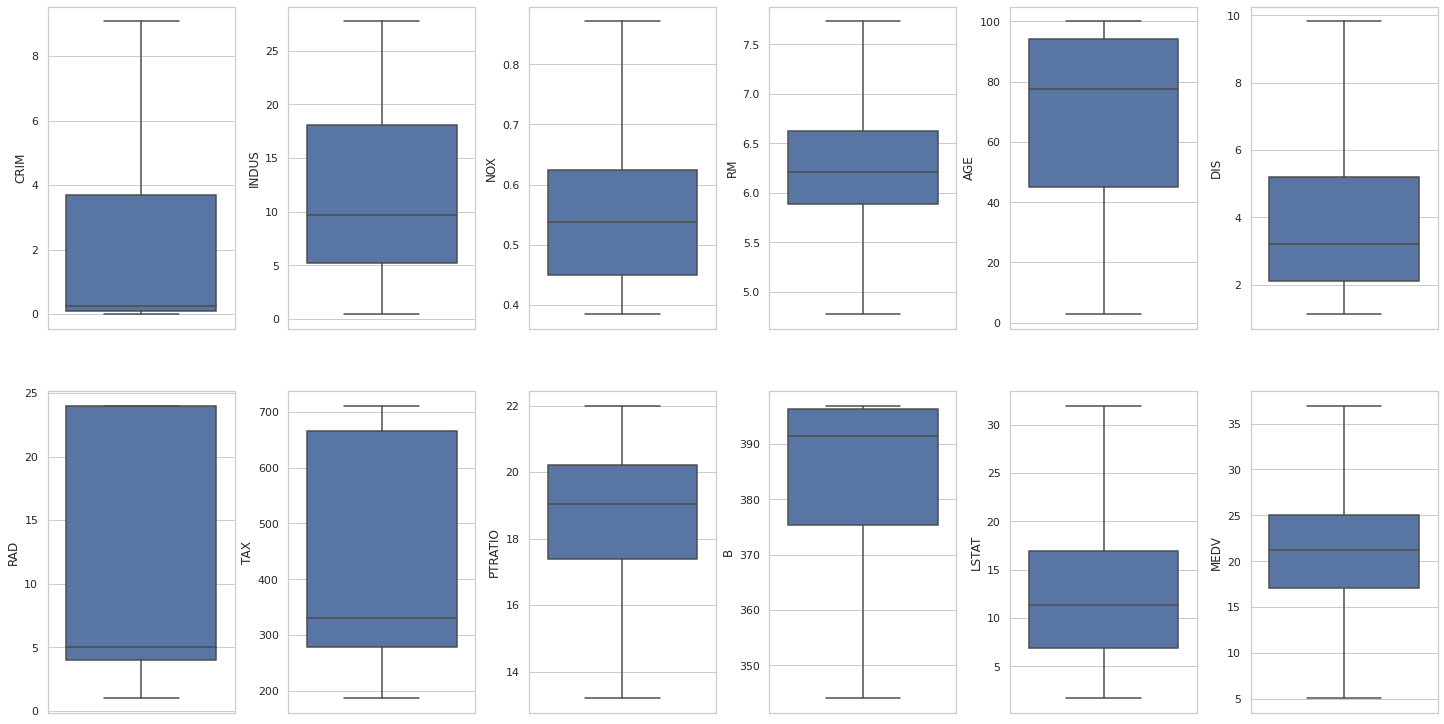

In [ ]:
fig, axs = plt.subplots(nrows= 2, ncols=6, figsize = (20,10))
index = 0
sns.set_theme(style= "whitegrid")
axs = axs.flatten() # We have to convert axis variable to numpy array.
for i in df.columns:
  sns.boxplot(y = df[i], ax= axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Our next step is to look at the distribution of features. If there is a high skewness in any feature, we need to remove it as we did with the outliers. After all, we already removed the outliers. 

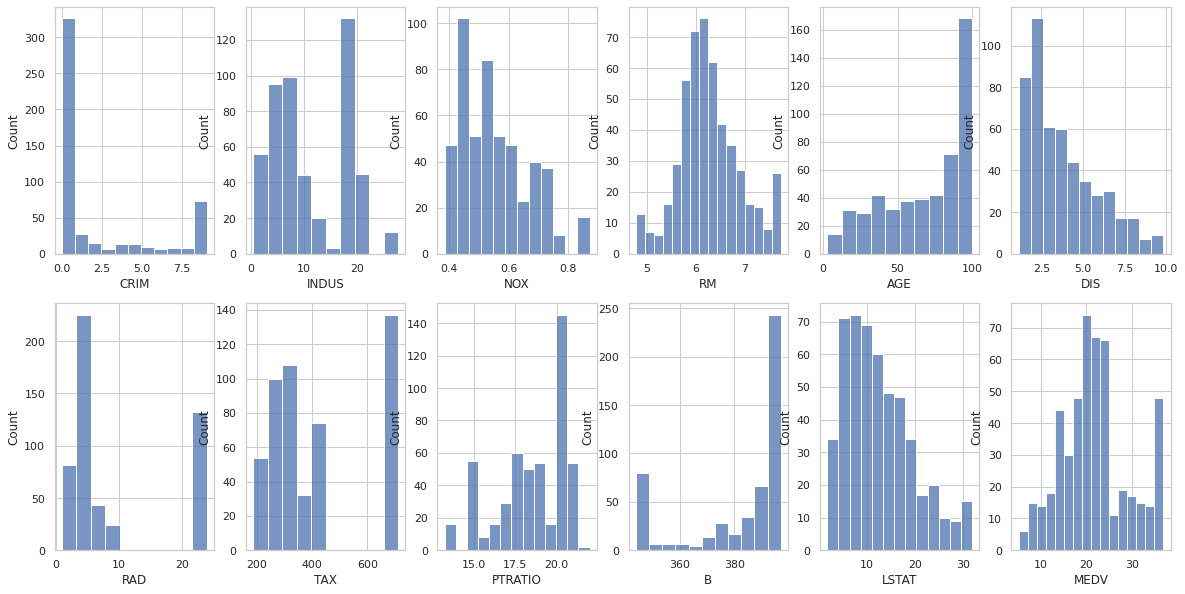

In [ ]:
fig, axis = plt.subplots(nrows= 2, ncols=6, figsize = (20,10))
index = 0
sns.set_theme(style= "whitegrid")
axis = axis.flatten() # We have to convert axis variable to numpy array.
for i in df.columns:
  sns.histplot(x = df[i], ax= axis[index])
  index += 1

If we look at the distribution of the features, we can see that some of features's skewness are so high. And as I said before, we need to get rid of them. However, we can use the log transformation to do this.

In [ ]:
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
y =  np.log1p(y)
for i in x.columns:
    if np.abs(x[i].skew()) > 0.3:
        x[i] = np.log1p(x[i])

We're done with outliers and skewness. Next step is feature engineering. Boston data set is a clean data set. So, actually there is not a hard or long things to do in this step. I'll only check the correaltion table with heatmap.

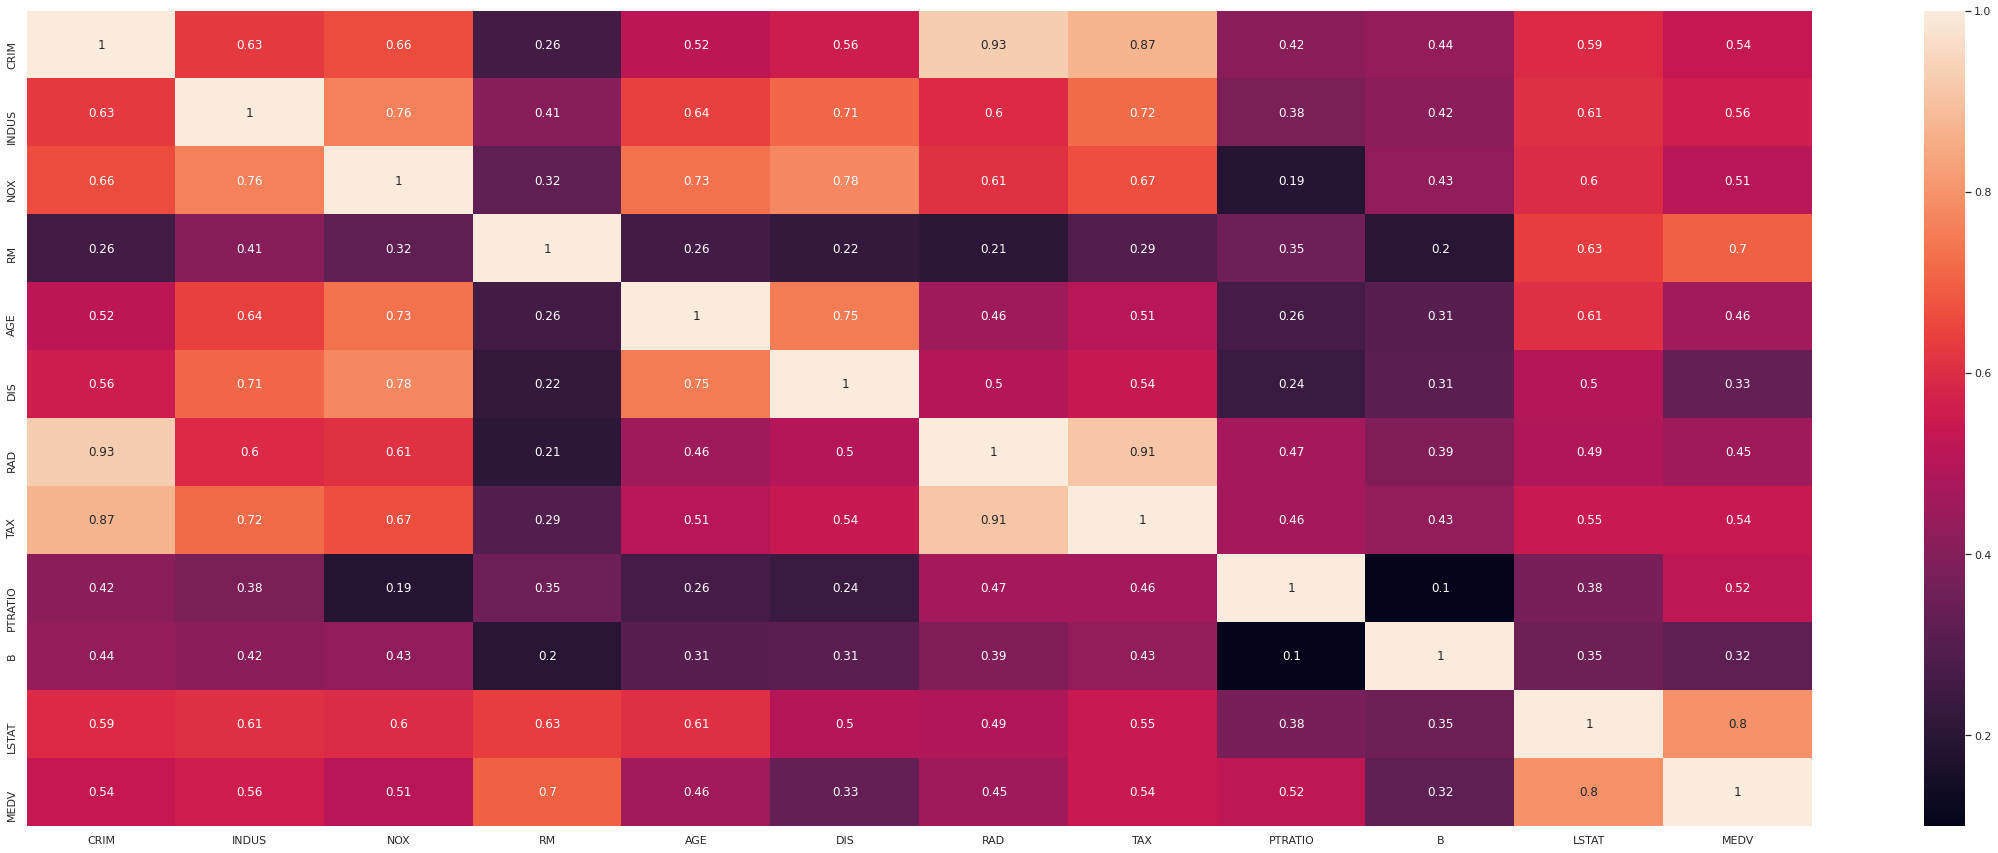

In [ ]:
correlationMatrix = df.corr()
plt.figure(figsize=(40,15))
sns.heatmap(data = correlationMatrix.abs(), annot = True)

If we check the correlation heatmap, we can see that clearly, some features are highly correlated and some of them are not. So, we can select a features that highly correlated with our MEDV feature(The feature we want to predict). Looking at the last column will make our job much easier.

In [ ]:
columns_for_x = ["INDUS", "NOX", "TAX", "PTRATIO", "AGE", "LSTAT", "RM"]
x = df.loc[:, columns_for_x]
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

We're ready to predict some values with different ML algorithms. The rest of the code gonna be training and testing algorithms with cross-validation technique.

In [ ]:
dict_for_r2 = {}
dtr = DecisionTreeRegressor()
cross_val = cross_val_score(dtr, x_train, y_train, cv = 10, scoring = "r2")
dict_for_r2.update({'Decision Tree Regressor' : cross_val.max()})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824}

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
svr = SVR(kernel = "rbf",C=1e3, gamma=0.1)
cross_val = cross_val_score(svr, x_train, y_train, cv = 10, scoring = "r2")
dict_for_r2.update({'SVR' : cross_val.max()})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824, 'SVR': 0.9097845041907794}

In [ ]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
cross_val = cross_val_score(ln, x_train, y_train, cv = 10, scoring = "r2")
dict_for_r2.update({"Linear Regression" :cross_val.max()})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824,
 'Linear Regression': 0.8720732056316463,
 'SVR': 0.9097845041907794}

In [ ]:
from sklearn.linear_model import Ridge
ridge_scores = []
for i in range(100):
  ridge = Ridge(alpha = i)
  cross_val = cross_val_score(ridge, x_train, y_train, cv = 10, scoring = "r2")
  ridge_scores.append(cross_val.max())
dict_for_r2.update({'Ridge Regression' : max(ridge_scores)})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824,
 'Linear Regression': 0.8720732056316463,
 'Ridge Regression': 0.8728440358367631,
 'SVR': 0.9097845041907794}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_scores = []
for i in range(1,100):
  knn = KNeighborsRegressor(n_neighbors= i)
  cross_val = cross_val_score(knn, x_train, y_train, cv = 10, scoring = "r2")
  knn_scores.append(cross_val.max())
dict_for_r2.update({'Neighbors Regression ' : max(knn_scores)})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824,
 'Linear Regression': 0.8720732056316463,
 'Neighbors Regression ': 0.8846303415837443,
 'Ridge Regression': 0.8728440358367631,
 'SVR': 0.9097845041907794}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[100, 200, 300], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[3,5,7], 'min_samples_leaf':[2,4,6,8,10]}
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
grid_cv = GridSearchCV(gbr, cv=10, param_grid=parameters, scoring='r2')
cross_val = cross_val_score(gbr, x_train, y_train, cv = 10, scoring = "r2")
dict_for_r2.update({'Gradient Boosting ': cross_val.max()})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824,
 'Gradient Boosting ': 0.9012471064458729,
 'Linear Regression': 0.8720732056316463,
 'Neighbors Regression ': 0.8846303415837443,
 'Ridge Regression': 0.8728440358367631,
 'SVR': 0.9097845041907794}

In [ ]:
from sklearn.linear_model import Lasso
lasso_scores = []
for i in range(1,100):
  lasso = Lasso(alpha = i)
  cross_val = cross_val_score(lasso, x_train, y_train, cv = 10, scoring = "r2")
  lasso_scores.append(cross_val.max())
dict_for_r2.update({"Lasso Regression" : max(lasso_scores)})
dict_for_r2

{'Decision Tree Regressor': 0.8512348347168824,
 'Gradient Boosting ': 0.9012471064458729,
 'Lasso Regression': 0.7572339774696353,
 'Linear Regression': 0.8720732056316463,
 'Neighbors Regression ': 0.8846303415837443,
 'Ridge Regression': 0.8728440358367631,
 'SVR': 0.9097845041907794}

In last, we tried 7 different algorithms and we have some accuracies. If we check our accuracy dictionary, we can see that the SVR and Gradient boosting methods are worked better than others. 
**As a result, we can use SVR or Gradient Boosting to predict MEDV feature.**